
# Chi Square Test

In [1]:
from pydataset import data

In [4]:
survey=data('survey')
survey.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [5]:
import pandas as pd

In [6]:
# H0 = Excer habbit doesnot depend on smoking habbit
# h1 = excer habbit does depend on smoking habbit

# alpha = 0.05

In [9]:
#Creating Frequency table
cont_table=pd.crosstab(index=survey.Smoke,columns=survey.Exer)
cont_table

Exer,Freq,None,Some
Smoke,,,
Heavy,7,1,3
Never,87,18,84
Occas,12,3,4
Regul,9,1,7


In [10]:
from scipy.stats import chi2_contingency

In [12]:
chi2_contingency(cont_table)

(5.488545890584232,
 0.48284216946545633,
 6,
 array([[ 5.36016949,  1.0720339 ,  4.56779661],
        [92.09745763, 18.41949153, 78.48305085],
        [ 9.25847458,  1.85169492,  7.88983051],
        [ 8.28389831,  1.65677966,  7.05932203]]))

In [13]:
#Group Bar Chart

In [15]:
age_smoke=survey.groupby(['Smoke','Exer'])['Age'].mean().reset_index()
age_smoke

,Smoke,Exer,Age
0,Heavy,Freq,22.773714
1,Heavy,None,20.917000
2,Heavy,Some,18.333667
3,Never,Freq,20.151379
4,Never,None,21.176000
5,Never,Some,20.179607
6,Occas,Freq,19.465250
7,Occas,None,25.805667
8,Occas,Some,18.875250
9,Regul,Freq,21.500000


In [16]:
#convert data in wide data

df_wide=age_smoke.pivot('Smoke','Exer','Age')
df_wide

Exer,Freq,None,Some
Smoke,,,
Heavy,22.773714,20.917000,18.333667
Never,20.151379,21.176000,20.179607
Occas,19.465250,25.805667,18.875250
Regul,21.500000,17.583000,21.154857


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

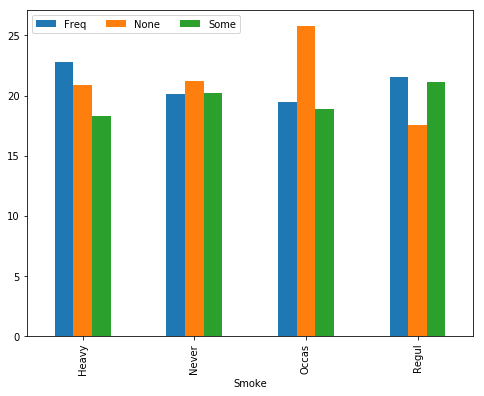

In [24]:
df_wide.plot(kind='bar')
plt.rcParams['figure.figsize']=8,6
ax=plt.subplot(111)
ax.legend(loc='upper left',ncol=3)
plt.show()

In [25]:
#always convert wide data if you are plotting two categorical colimns as groupbar chart

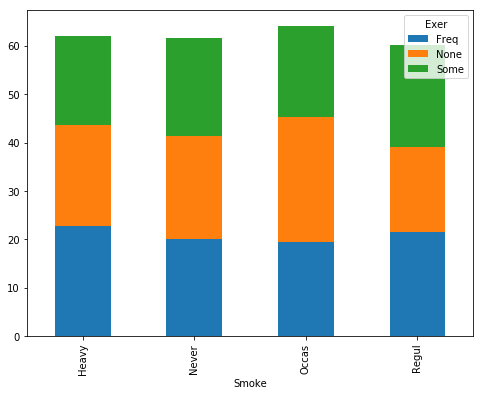

In [26]:
df_wide.plot(kind="bar",stacked=True)
plt.show()

# Anova

In [45]:
from pydataset import data
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [46]:
#DATA
df=data('chickwts')
df

,weight,feed
1,179,horsebean
2,160,horsebean
3,136,horsebean
4,227,horsebean
5,217,horsebean
6,168,horsebean
7,108,horsebean
8,124,horsebean
9,143,horsebean
10,140,horsebean


In [47]:
df.groupby(['feed']).size().reset_index()

,feed,0
0,casein,12
1,horsebean,10
2,linseed,12
3,meatmeal,11
4,soybean,14
5,sunflower,12


In [48]:
#Average weight of each sample

In [49]:
df.groupby(['feed'])['weight'].mean().reset_index()

,feed,weight
0,casein,323.583333
1,horsebean,160.200000
2,linseed,218.750000
3,meatmeal,276.909091
4,soybean,246.428571
5,sunflower,328.916667


In [50]:
#Lets set up hypothesis
#H0:Feed does not impact the weight of chickens. #pvalue=5.936419853471331e-10 less then 0.05 so reject null hypothesis.
#H1:Feed does impact the weight of chickens.
#Significance=0.05


In [53]:
#creating array of weight of category:feed
casein = df['weight'][df['feed']=='casein']
horsebean=df['weight'][df['feed']=='horsebean']
linseed=df['weight'][df['feed']=='linseed']
meatmeal=df['weight'][df['feed']=='meatmeal']
soybean=df['weight'][df['feed']=='soybean']
sunflower=df['weight'][df['feed']=='sunflower']

In [54]:
#Creating Anova Model
stats.f_oneway(casein,horsebean,linseed,meatmeal,soybean,sunflower)

F_onewayResult(statistic=15.364799774712534, pvalue=5.936419853471331e-10)

In [55]:
#As null is reject i will perform tukey HSD test;

HSD=pairwise_tukeyhsd(df.weight,df.feed,alpha=0.05)     #HSD=honestly significance difference

HSD.summary()

group1,group2,meandiff,lower,upper,reject
casein,horsebean,-163.3833,-232.3445,-94.4222,True
casein,linseed,-104.8333,-170.5852,-39.0814,True
casein,meatmeal,-46.6742,-113.9039,20.5554,False
casein,soybean,-77.1548,-140.5149,-13.7947,True
casein,sunflower,5.3333,-60.4186,71.0852,False
horsebean,linseed,58.55,-10.4112,127.5112,False
horsebean,meatmeal,116.7091,46.3375,187.0806,True
horsebean,soybean,86.2286,19.544,152.9132,True
horsebean,sunflower,168.7167,99.7555,237.6778,True
linseed,meatmeal,58.1591,-9.0705,125.3887,False


In [56]:
#Tye Data

In [58]:
import os
import pandas as pd
import numpy as np

path= r"C:\Users\Lenovo\Desktop\Data Sets\Cars"
os.chdir(path)
os.listdir(path)
tyre = pd.read_csv("tyre.csv")

In [59]:
tyre.head()

,Brands,Mileage
0,Apollo,32.998
1,Apollo,36.435
2,Apollo,32.777
3,Apollo,37.637
4,Apollo,36.304


In [61]:
tyre1=tyre.groupby('Brands')['Mileage'].mean().reset_index()
tyre1

,Brands,Mileage
0,Apollo,34.799133
1,Bridgestone,31.780133
2,CEAT,34.761207
3,Falken,37.624667


In [62]:
#H0:Mileage does not impact Brands
#H1: Mileage impact on Brands
#Alpha=0.05

In [66]:
Apollo=tyre['Mileage'][tyre['Brands']=='Apollo']
Bridgestone=tyre['Mileage'][tyre['Brands']=='Bridgestone']
CEAT=tyre['Mileage'][tyre['Brands']=='CEAT']
Falken=tyre['Mileage'][tyre['Brands']=='Falken']

In [68]:
stats.f_oneway(Apollo,Bridgestone,CEAT,Falken)

F_onewayResult(statistic=17.941513342446925, pvalue=2.78098919789432e-08)

In [74]:
HSD=pairwise_tukeyhsd(tyre.Mileage,tyre.Brands,alpha=0.05)
HSD.summary()

group1,group2,meandiff,lower,upper,reject
Apollo,Bridgestone,-3.019,-5.1289,-0.9091,True
Apollo,CEAT,-0.0379,-2.1478,2.072,False
Apollo,Falken,2.8255,0.7156,4.9354,True
Bridgestone,CEAT,2.9811,0.8712,5.091,True
Bridgestone,Falken,5.8445,3.7346,7.9544,True
CEAT,Falken,2.8635,0.7536,4.9734,True


# Clusturing

In [88]:
from pydataset import data
df=data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [89]:
#Drop Species Columns because it is not important to us
df1=df.drop(columns='Species',axis=1)
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [90]:
from sklearn.cluster import KMeans

In [91]:
#Create KMeans Object
km=KMeans(n_clusters=3,init='k-means++',random_state=1234)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [92]:
#fitting the model on my data
km.fit(df1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [93]:
#Identigying the centroids cordinate

km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [94]:
#Creating the column in our data set


df1['Clustor']=km.predict(df1.values)
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Clustor
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [96]:
df1.groupby('Clustor').size()

Clustor
0    50
1    62
2    38
dtype: int64

In [97]:
#lets plot the scatter plot for sepal lengh and sepal width

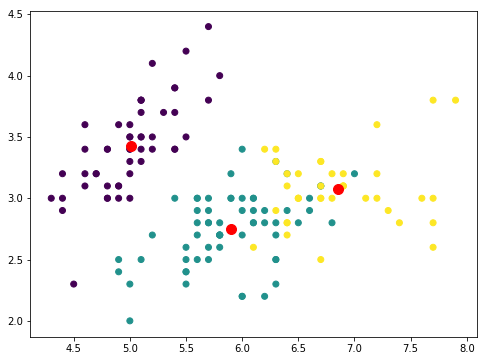

In [103]:
from matplotlib import pyplot as plt
plt.scatter(df1['Sepal.Length'],df1['Sepal.Width'],   c=df1['Clustor'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',s=100)
plt.show()

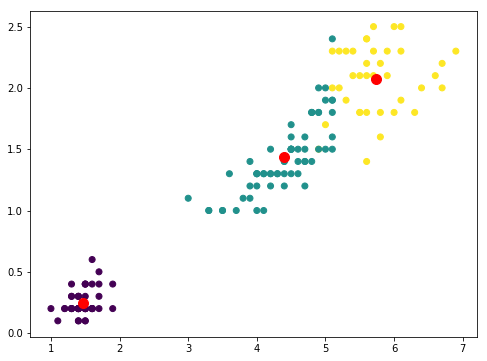

In [104]:
plt.scatter(df1['Petal.Length'],df1['Petal.Width'],   c=df1['Clustor'])
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],c='red',s=100)
plt.show()

# Linear Regression

In [107]:
import os
import pandas as pd
import numpy as np

path= r"C:\Users\Lenovo\Desktop\Data Sets\Cars"
os.chdir(path)
os.listdir(path)
car = pd.read_excel("Cars.xlsx")

In [108]:
car.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact


In [110]:
car.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [111]:
IQR=19-14
IQR

5

In [112]:
UL=19+1.5*5
UL

26.5

In [113]:
LL=14-1.5*5
LL

6.5

In [114]:
#Find out the cars in outlier
Outlier = car[(car.cty>UL)] | car[(car.cty<LL)]
Outlier

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
99,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN
196,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN
212,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN
221,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN
222,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN


([<matplotlib.axis.XTick at 0x1f76b3a0208>,
 <a list of 2 Text xticklabel objects>)

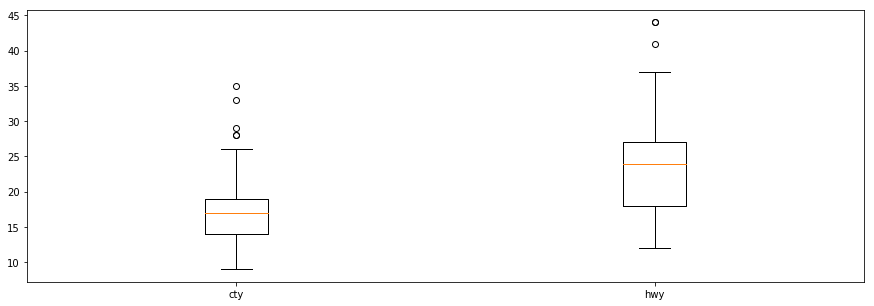

In [117]:
from matplotlib import pyplot as plt

data = car[['cty', 'hwy']].values

data

plt.boxplot(data)

plt.xticks([1,2], ['cty', 'hwy'])

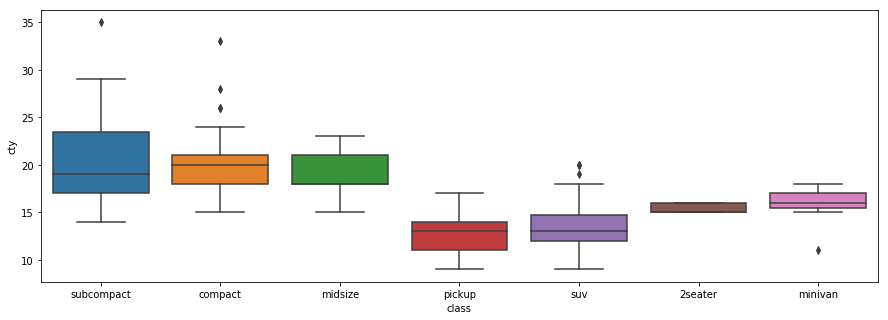

In [118]:
# Using seaborn lib - also adding a categorical column - City milage for each class

import seaborn as sns

plt.rcParams['figure.figsize'] = [15,5]

#sns.boxplot(data=car, x='class', y='cty')

# Controlling the order of diplay of class

order=["subcompact", "compact", "midsize", "pickup", "suv", "2seater", "minivan"]

sns.boxplot(data=car, x='class', y='cty', order=order)

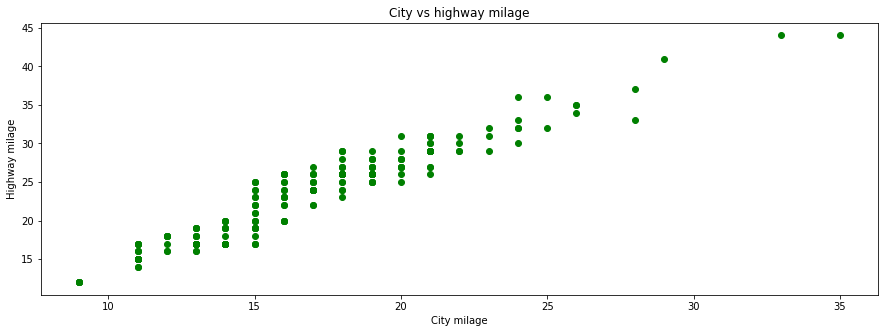

In [119]:
# Relationship analysis - Scatter plot

# Want to understand what kind of relation exist between city milage and highway milage

plt.scatter(car['cty'], car['hwy'], color='green')

plt.xlabel("City milage")

plt.ylabel("Highway milage")

plt.title("City vs highway milage")

plt.show()


# Correlation matrix: A matrix containing the correlation coefficient values of variables.

In [125]:
from pydataset import data

df = data('mtcars')

df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [123]:
# Creating a correlation matrix

Matrix = df.corr()

Matrix

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


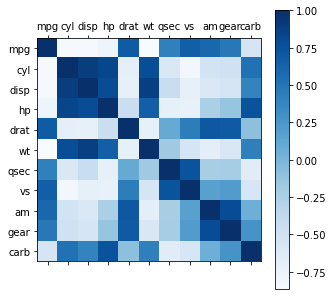

In [124]:
# Ploting the correlation matrix using matshow

# cmap will help you to give a specific color to the matrix

plt.matshow(Matrix, cmap = 'Blues')

# labeling the xticks and yticks
plt.xticks(range(len(Matrix.columns)), Matrix.columns)

plt.yticks(range(len(Matrix.columns)), Matrix.columns)

# Using the color bar to referance the color 

plt.colorbar()

plt.show()

# Simple Linear Regression Model

In [127]:
import os
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [128]:
# I am defining my X and Y
X=car[['cty']]
Y=car[['hwy']]

In [129]:
#LR object
lm = LinearRegression()

In [130]:
#Fitting the model

model=lm.fit(X,Y)

In [131]:
#Printing the value for intercept

print("Intercept value:",lm.intercept_)
print("Coeficient value:",lm.coef_)

Intercept value: [0.8920411]
Coeficient value: [[1.33745561]]


In [132]:
#4 Step Proccess
X=car[['cty']]
Y=car[['hwy']]


#Step1: splitting the data into training and test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(187, 47, 187, 47)

In [133]:
#Creating the model
lm1=LinearRegression()
#fitting the model

model1=lm1.fit(X_train,Y_train)


#Pred> the result for X_test
Y_test['hwy_Pred']= model1.predict(X_test)
Y_test.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,hwy,hwy_Pred
191,26,24.975512
206,20,22.337827
41,24,23.656669
125,17,19.700142
45,21,21.018984


In [134]:
Y_test.corr()

,hwy,hwy_Pred
hwy,1.000000,0.961685
hwy_Pred,0.961685,1.000000


# Misssing Value Treatment

In [136]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\Data Sets\Cars"
os.chdir(path)
os.listdir(path)
election=pd.read_excel("Election data base.xlsx")

In [137]:
Null_value=election.isnull().sum()
Null_value

st_name           0
year              0
ac_no             0
ac_name       16083
ac_type           0
cand_name         1
cand_sex       5302
partyname         0
partyabbre     2706
totvotpoll        7
electors          0
dtype: int64

In [139]:
Null_value=(election.isnull().sum()/len(election))*100
Null_value

st_name       0.000000
year          0.000000
ac_no         0.000000
ac_name       4.913931
ac_type       0.000000
cand_name     0.000306
cand_sex      1.619950
partyname     0.000000
partyabbre    0.826780
totvotpoll    0.002139
electors      0.000000
dtype: float64

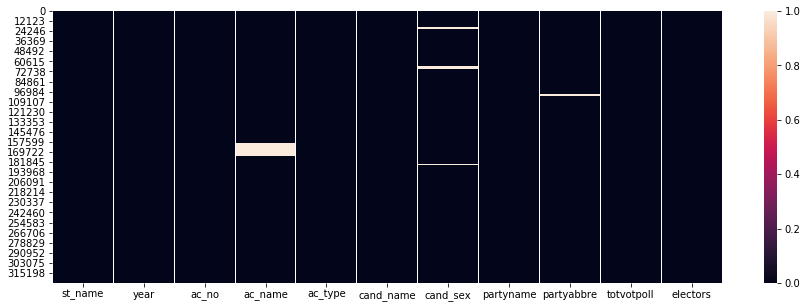

In [141]:
#plotting the missing value

import seaborn as sns
sns.heatmap(election.isnull())

In [142]:
# Replacing the missing value

# a) By zero or a specific value

election['totvot_zero_fill'] = election['totvotpoll'].fillna(0)

election.isnull().sum()


st_name                 0
year                    0
ac_no                   0
ac_name             16083
ac_type                 0
cand_name               1
cand_sex             5302
partyname               0
partyabbre           2706
totvotpoll              7
electors                0
totvot_zero_fill        0
dtype: int64

In [143]:
# b) By mean / median of the of totvotpoll

election['totvot_mean_fill'] = election['totvotpoll'].fillna(election['totvotpoll'].mean())

election.isnull().sum()

st_name                 0
year                    0
ac_no                   0
ac_name             16083
ac_type                 0
cand_name               1
cand_sex             5302
partyname               0
partyabbre           2706
totvotpoll              7
electors                0
totvot_zero_fill        0
totvot_mean_fill        0
dtype: int64

In [146]:
# Lets check the impact of imputing missing value by mean

# Lets take the state of sikkim as the column have missing value under totvotpoll column

sikkim_data = election[election['st_name'] == "Sikkim"]

# lets check the missing values which are in year 2004

sikkim_data_missing = sikkim_data[sikkim_data['year'] == 2004] 

#sikkim_data_missing

In [147]:
# Lets plot the total vote year wise

totvotpoll_line = sikkim_data.groupby(['year'])['totvotpoll'].sum().reset_index()

totvotpoll_line.head()

# lets get the same for the column where we have imputed the mean values

totvotpoll_mean_fill_line = sikkim_data.groupby(['year'])['totvot_mean_fill'].sum().reset_index()

totvotpoll_mean_fill_line.head()

,year,totvot_mean_fill
0,1979.0,72339.0
1,1985.0,97057.0
2,1989.0,133619.0
3,1994.0,173457.0
4,1999.0,204927.0


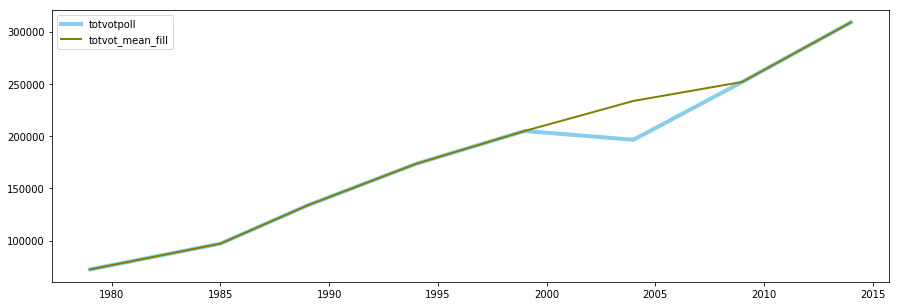

In [148]:
# lets plot these two line chart

plt.plot( 'year', 'totvotpoll', data=totvotpoll_line, color='skyblue', linewidth=4)
plt.plot( 'year', 'totvot_mean_fill', data=totvotpoll_mean_fill_line, color='olive', linewidth=2)
plt.legend()
plt.show()

# #Market Basket Analysis

In [3]:
import os
import pandas as pd

path= r"E:\instacart_2017_05_01"
os.chdir(path)
os.listdir(path)
aisles=pd.read_csv("aisles.csv")
departments=pd.read_csv("departments.csv")
orders_product1 = pd.read_csv("order_products__part1.csv")
orders_product2 = pd.read_csv('order_products__part2.csv')
orders =pd.read_csv("orders.csv")
products =pd.read_csv("products.csv")

In [4]:
#we will append both orders excel
trans_df=orders_product2.append(orders_product1,ignore_index=True)
orders_product2.shape

(32434489, 4)

In [152]:
#percentage of customer placing more than  80 orders
customer=orders.groupby('user_id')['order_id'].count().reset_index()
customer.head()

,user_id,order_id
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


In [155]:
customer1=customer[customer['order_id']>80]
customer1.head()

,user_id,order_id
26,27,82
209,210,100
309,310,100
312,313,100
408,409,87


In [157]:
(len(customer1)/len(customer))*100

1.3719090825327702

In [158]:
#Which is more popular Organic Strawberries or Strawberries?


In [159]:
organic_strawberry=trans_df[trans_df['product_id']==2237]

In [161]:
len(organic_strawberry)/len(trans_df.groupby('order_id').size())*100

0.026269521706425093

In [162]:
strawberry=trans_df[trans_df['product_id']==16797]
len(strawberry)/len(trans_df.groupby('order_id').size())*100

4.466266975445618

In [163]:
#How likely is it to purshace banana if someone purchase Strawberries?
#How likely is it to purshace banana if someone purchase Strawberries?

banana=trans_df[trans_df['product_id']==24852]
Strawberries=trans_df[trans_df['product_id']==16797]

In [164]:
Confidence=pd.merge(banana,Strawberries,left_on='order_id',right_on='order_id',how='inner')
len(Confidence)

43180

In [165]:
(len(Confidence)/len(Strawberries))*100

28.893572886346146

In [1]:
#Finding top 20 products

In [9]:
productcount=trans_df.groupby(['product_id']).size().reset_index()
productcount.head()
#Renaminig the 0 columns
productcount=productcount.rename(columns={0:"Freq"})
#Findin the top 20 prducts
productcount_top20=productcount.sort_values(by='Freq',ascending=False)
productcount_top20.head()

,product_id,Freq
24849,24852,491291
13173,13176,394930
21134,21137,275577
21900,21903,251705
47205,47209,220877


In [11]:
newproductcountdf=pd.merge(productcount_top20,products,left_on='product_id',right_on='product_id',how='inner')
newDf=newproductcountdf[['product_id','product_name']]
newDf.head()

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado


In [13]:
productID=newDf[['product_id']]
productID.head()

,product_id
0,24852
1,13176
2,21137
3,21903
4,47209


In [14]:
df=trans_df[0:0]
for i in range(0,20):
    pID=productID.iloc[i]['product_id']
    stDF=trans_df[trans_df['product_id']==pID]
    df=df.append(stDF,ignore_index=False)
df.head()

,order_id,product_id,add_to_cart_order,reordered
77,10,24852,1,1
180,20,24852,6,0
190,22,24852,3,1
234,26,24852,2,1
414,52,24852,2,1


In [15]:
#Getting the names for each product ID


df=pd.merge(df,newDf,left_on='product_id',right_on='product_id',how='inner')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,10,24852,1,1,Banana
1,20,24852,6,0,Banana
2,22,24852,3,1,Banana
3,26,24852,2,1,Banana
4,52,24852,2,1,Banana


In [16]:
#Lets create the long table of order_id and product_name

basket=df.groupby(['order_id','product_name']).size().reset_index()
basket.head()

,order_id,product_name,0
0,1,Bag of Organic Bananas,1
1,1,Cucumber Kirby,1
2,1,Organic Hass Avocado,1
3,3,Organic Baby Spinach,1
4,5,Bag of Organic Bananas,1


In [17]:
#Converting the long data to wide data

basket1=basket.pivot('order_id','product_name',0)
basket1.head()

product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Cucumber Kirby,Large Lemon,Limes,Organic Avocado,Organic Baby Spinach,Organic Blueberries,Organic Fuji Apple,Organic Garlic,Organic Grape Tomatoes,Organic Hass Avocado,Organic Lemon,Organic Raspberries,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Strawberries
order_id,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [18]:
#FIll nan with 0

Final_basket=basket1.fillna(0)
Final_basket.head()

product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Cucumber Kirby,Large Lemon,Limes,Organic Avocado,Organic Baby Spinach,Organic Blueberries,Organic Fuji Apple,Organic Garlic,Organic Grape Tomatoes,Organic Hass Avocado,Organic Lemon,Organic Raspberries,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Strawberries
order_id,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [20]:
#Creating the frequenting occuring itemset


freq_itemset=apriori(Final_basket,min_support=0.01,use_colnames=True)

In [21]:
#Creating Rules

rules=association_rules(freq_itemset, metric='lift',min_threshold=1.05)

In [22]:
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(Organic Fuji Apple),(Banana),0.051555,0.272675,0.019511,0.378441,1.387882,0.005453,1.170162
11,(Cucumber Kirby),(Banana),0.055351,0.272675,0.018227,0.329296,1.207649,0.003134,1.084420
13,(Organic Avocado),(Banana),0.102248,0.272675,0.030865,0.301866,1.107055,0.002985,1.041813
6,(Organic Raspberries),(Bag of Organic Bananas),0.079147,0.219193,0.023468,0.296508,1.352728,0.006119,1.109902
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.122591,0.219193,0.035943,0.293199,1.337631,0.009072,1.104706
17,(Strawberries),(Banana),0.082945,0.272675,0.023966,0.288936,1.059634,0.001349,1.022868
0,(Apple Honeycrisp Organic),(Bag of Organic Bananas),0.048437,0.219193,0.013533,0.279391,1.274634,0.002916,1.083537
4,(Organic Lemon),(Bag of Organic Bananas),0.050646,0.219193,0.013015,0.256983,1.172407,0.001914,1.050861
54,(Organic Raspberries),(Organic Strawberries),0.079147,0.152950,0.019721,0.249174,1.629122,0.007616,1.128158
46,(Organic Lemon),(Organic Hass Avocado),0.050646,0.122591,0.012225,0.241389,1.969067,0.006017,1.156600
